# Energy Convervation
Here, we will discuss the effects of energy conservation according to Parseval's Theorem.

We find that the energy is only conserved when the number of bins used for the FFT is greater or equal than the number of samples in the time sample.

In [1]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
from internal import *

#### Generate a signal

In [2]:
sr = 100;       # Hz. Sampling rate
t = 2;         # s. Duration of the signal
N = 100;      # Number of different frequencies composing the signal

f = [1.3333, 11.11111] # Hz. Main frequencies of the simulated signals
sigma_f = 0.01 # standard deviation around the frequencies chosen for the signal generation
sigma_A = 0.5 # standard deviation around the amplitudes chosen for the signal generation

F   = np.zeros(N*len(f))
A   = np.zeros(N*len(f))
phi = np.zeros(N*len(f))
k = -1 
for f0 in f:
    k += 1
    F[N*k:N*(k+1)] = generate_frequencies(N, sr=sr, f0=f0,sigma=sigma_f);
    A[N*k:N*(k+1)] = generate_amplitudes(N, sigma= sigma_A);
    phi[N*k:N*(k+1)] = generate_phase(N);

sort_ids = F.argsort()
F   = F[sort_ids]
A   = A[sort_ids]
phi = phi[sort_ids]
x, y = generate_signal(F, A, t=t, sr=sr, phi=phi);


        signal duration: 2.0 s
        sample rate:     100 Hz
        Nº samples:      200
        


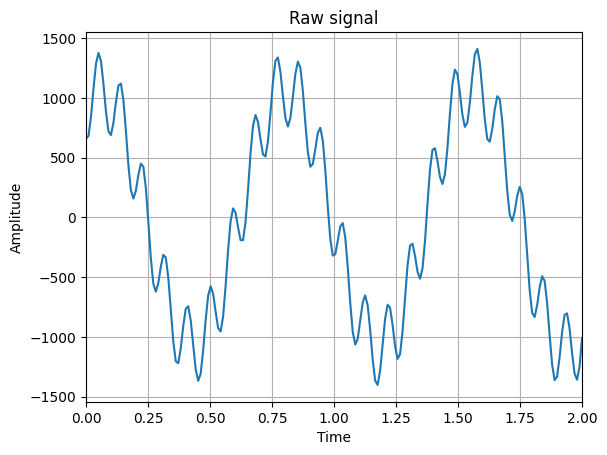

In [3]:
signal = Processor(y, sr)
signal.check()
signal.plot_signal();

### Testing for energy conservation
We now test for a different number of bins of the FFT. We find that the energy is only conserved when the number of bins is greater or equal than the number of samples in the time signal

In [4]:
signal.fft_bin(200)
signal.check_fft();
signal.bins_check()
signal.Parseval()



        signal duration:2.0 s
        sample rate:    100 Hz
        Nº samples:     200
        FFT bins:       200 
        FFT resolution: 0.5 Hz
        window length:  2.0 s
        window overlap: None s 
        window shift:   None s
        Nº of windows:  None
        

        Energy time domain:      135167839.42956913
        Energy frequency domain: 135167839.42956913
        Ratio:                   1.0
        


In [5]:
signal.fft_bin(1000)
signal.check_fft();
signal.bins_check()
signal.Parseval()


        signal duration:2.0 s
        sample rate:    100 Hz
        Nº samples:     200
        FFT bins:       1000 
        FFT resolution: 0.1 Hz
        window length:  2.0 s
        window overlap: None s 
        window shift:   None s
        Nº of windows:  None
        
Warning!
  The number of FFT bins (1000) is greater than the number of time samples (200). The resulting frequency resolution will not be accurate

        Energy time domain:      135167839.42956913
        Energy frequency domain: 135167839.42956913
        Ratio:                   1.0
        


In [6]:
signal.fft_bin(100)
signal.check_fft();
signal.bins_check()
try:
    signal.Parseval()
except Exception as exc:
    print(exc)


        signal duration:2.0 s
        sample rate:    100 Hz
        Nº samples:     200
        FFT bins:       100 
        FFT resolution: 1.0 Hz
        window length:  2.0 s
        window overlap: None s 
        window shift:   None s
        Nº of windows:  None
        
Warning!
  The number of FFT bins (100) is smaller than the number of time samples (200). The energy might not be conserved

        Energy time domain:      135167839.42956913
        Energy frequency domain: 64748047.19502091
        Ratio:                   2.0875971598408833
        
The energy is not conserved. Ratio: 2.0875971598408833
